In [142]:
#import the necessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
#calling this option to stop the rows and columns from being truncated in their display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [144]:
wd = r"C:\Users\kaitl\OneDrive\Documents\Side Projects\WiDS"
train = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
train_df = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
test_df= pd.read_csv(wd+r'\UnlabeledWiDS2021.csv')

In [145]:
train.shape

(130157, 181)

In [146]:
train=train.iloc[:,1:]

In [147]:
train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [148]:
train.diabetes_mellitus.mean()

0.21628494817796967

21.6% of the patients in the training dataset have diabetes_mellitus

<AxesSubplot:>

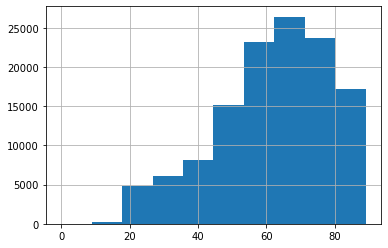

In [149]:
train.age.hist()

In [150]:
train.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,11

-thangs to look at:
    -age where < 5 vs weight

In [151]:
var_names = train.columns.tolist()
#var_names

In [152]:
round(train.isna().sum()/len(train)*100,2)

encounter_id                    0.00
hospital_id                     0.00
age                             3.83
bmi                             3.45
elective_surgery                0.00
ethnicity                       1.22
gender                          0.05
height                          1.60
hospital_admit_source          25.51
icu_admit_source                0.18
icu_id                          0.00
icu_stay_type                   0.00
icu_type                        0.00
pre_icu_los_days                0.00
readmission_status              0.00
weight                          2.66
albumin_apache                 60.05
apache_2_diagnosis              1.29
apache_3j_diagnosis             0.66
apache_post_operative           0.00
arf_apache                      0.00
bilirubin_apache               63.43
bun_apache                     19.52
creatinine_apache              19.12
fio2_apache                    76.62
gcs_eyes_apache                 1.68
gcs_motor_apache                1.68
g

In [153]:
#suffix=train.columns[train.startswith('h1')==True]
suffix= [col[3:] for col in train if col.startswith('h1')]

#suffix

In [154]:
# Create dataframes for each measurement to check for matching values
vars = {}
for i in suffix:
    vars[i] = train[train['h1_'+i] == train['d1_'+i]][['h1_'+i,'d1_'+i]]
    vars[i] = vars[i].dropna(axis=0)
    #print(vars[i])

In [155]:
# Check for percent matching between h1 and d1 columns for each measurement
vars2 = {'Var':[],'Percent Match':[]}
for i in suffix:
    vars2['Var'].append(i)
    PM = (len(vars[i]) / train['h1_'+i].notnull().count()) *100
    vars2['Percent Match'].append(PM)

x = pd.DataFrame(vars2)
x = x.sort_values('Percent Match', ascending=False)
x.head()

,Var,Percent Match
16,spo2_max,50.950775
45,inr_min,37.603817
44,inr_max,37.603817
25,temp_min,31.367502
6,heartrate_max,26.186068


In [156]:
# Create dataframes for each measurement to check if h1 has value and d1 does not
vars3 = {}
for i in suffix:
    vars3[i] = train[train['h1_'+i].isna() & train['d1_'+i].notnull()][['h1_'+i,'d1_'+i]]
    #print(vars3[i])

In [157]:
# Data frames where d1 is greater than h1 (should only see this in max values)
vars4 = {}
for i in suffix:
    vars4[i] = train[train['h1_'+i] < train['d1_'+i]][['h1_'+i,'d1_'+i]]
    #print(vars4[i])

In [158]:
# Take min/max between h1 and d1 columns

train2 = train
suffix2= [col[3:-4] for col in train if col.startswith('h1')]
for i in suffix2:
    train2[i + '_min'] = train2[['d1_'+i+'_min','h1_'+i+'_min']].min(axis=1)
    train2[i + '_max'] = train2[['d1_'+i+'_max','h1_'+i+'_max']].max(axis=1)

In [159]:
# drop original d1 and h1 columns
train3 = train2.loc[:,~train2.columns.str.startswith('h1')]
train4 = train3.loc[:,~train3.columns.str.startswith('d1')]

In [160]:
train = train4

In [161]:
# Drop Identifiers
identifiers = ['encounter_id','hospital_id','icu_id']
train = train.drop(identifiers,axis=1)

In [162]:
# Drop invasive treatments
invasive = train.columns.str.contains('invasive')
train = train.loc[:,~invasive]

In [163]:
# Drop readmission status
train = train.drop('readmission_status', axis=1)

In [164]:
# Fill NA gender
train['gender'] = train.gender.fillna('Unknown')

In [165]:
# Fill NA age
train['age'] = train.age.fillna(train.age.median())

In [166]:
# Fill NA weight with mean from age and gender
train5 = train
train5['weight'] = train5.groupby(['gender','age'])['weight'].transform(lambda x: x.fillna(x.mean()))

In [167]:
# Drop 3 remaining NA columns
train5 = train5.loc[~train5.weight.isna() == True]

In [168]:
# Fill NA height with mean from age and gender
train5['height'] = train5.groupby(['gender','weight'])['height'].transform(lambda x: x.fillna(x.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
# Drop 19 remaining NA
train5 = train5.loc[~train5.height.isna() == True]

In [170]:
train = train5
train.columns.str.contains('apache')

apache = []
for i in var_names:
    if 'apache' in i:
        apache.append(i)
        
#print(apache)

In [171]:
# Drop duplicate apache columns
apache_drop = ['albumin_apache','bilirubin_apache','bun_apache','creatinine_apache','glucose_apache','hematocrit_apache','resprate_apache','sodium_apache','temp_apache','wbc_apache','heart_rate_apache']
train = train.drop(apache_drop,axis=1)

In [172]:
# Fill in pa2fio2ratio with apache ratio
train6 = train


In [173]:
# Fill missing ethnicity with Unknown
train6['ethnicity'] = train6.ethnicity.fillna('Other/Unknown')

In [174]:
train = train6

In [175]:
train7 = train
bmi = train7.weight / (train7.height/100)**2
train7.bmi = train7.bmi.fillna(bmi)

In [176]:
train = train7
df = pd.DataFrame(train.isna().mean().sort_values(ascending=False))

In [177]:
df = df.loc[df.iloc[:,0] > .5]

In [178]:
for i in df.index:
        x = pd.crosstab(train[i].isna(),train.diabetes_mellitus).apply(lambda r: r/r.sum(), axis=1)
        #print(x)

In [179]:
train = train.drop(df.index, axis=1)

In [180]:
pd.DataFrame(train.isna().mean().sort_values(ascending=False))

,0
urineoutput_apache,0.485273
hospital_admit_source,0.255089
hco3_max,0.154002
hco3_min,0.154002
platelets_max,0.142537
platelets_min,0.142537
wbc_max,0.133869
wbc_min,0.133869
calcium_max,0.128213
calcium_min,0.128213


In [181]:
# Compare Hospital Admit Source with ICU Admit Source
pd.crosstab(train.hospital_admit_source,train.icu_admit_source)
# Seems to be some correlation. We will drop hospital due to 25% missing
train = train.drop('hospital_admit_source', axis=1)

In [182]:
pd.crosstab(train.urineoutput_apache.isna(), train.diabetes_mellitus).apply(lambda r: r/r.sum(), axis=1)

diabetes_mellitus,0,1
urineoutput_apache,,
False,0.799848,0.200152
True,0.766623,0.233377


<AxesSubplot:title={'center':'urineoutput_apache'}, xlabel='diabetes_mellitus'>

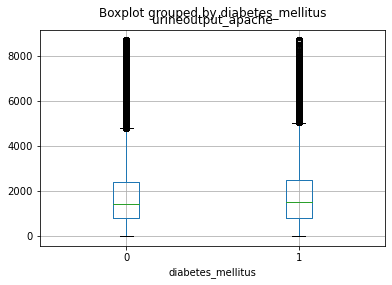

In [183]:
# Look at distribution of urine
train.boxplot('urineoutput_apache',by='diabetes_mellitus')

In [184]:
# Drop urine output
train = train.drop('urineoutput_apache', axis=1)

In [185]:
# for i in train.columns:
#     if train[i].dtype != 'object':
        #print(train.hist(i))

In [186]:
# How many levels are in the variable (how many dummy variables will we need)
print(len(train.apache_2_diagnosis.unique()))
print(len(train.apache_3j_diagnosis.unique()))

45
401


10x number of variables divided by the rate of occurrence
- we need 40 rows for each variable in logistic regression

In [187]:
# Create dataset with imputed values (separate from train)
train_imput = train.copy()

In [188]:
# Check rate of missing values in each column remaining
pd.DataFrame(train_imput.isna().mean().sort_values(ascending=False))

,0
hco3_min,0.154002
hco3_max,0.154002
platelets_max,0.142537
platelets_min,0.142537
wbc_max,0.133869
wbc_min,0.133869
calcium_min,0.128213
calcium_max,0.128213
hemaglobin_max,0.124671
hemaglobin_min,0.124671


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


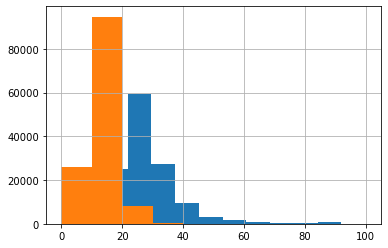

In [189]:
print(train_imput.resprate_max.hist())
print(train_imput.resprate_min.hist())

In [190]:
min_max = [col for col in train_imput if col.endswith('max') | col.endswith('min')]
print(min_max)


['diasbp_min', 'diasbp_max', 'heartrate_min', 'heartrate_max', 'mbp_min', 'mbp_max', 'resprate_min', 'resprate_max', 'spo2_min', 'spo2_max', 'sysbp_min', 'sysbp_max', 'temp_min', 'temp_max', 'bun_min', 'bun_max', 'calcium_min', 'calcium_max', 'creatinine_min', 'creatinine_max', 'glucose_min', 'glucose_max', 'hco3_min', 'hco3_max', 'hemaglobin_min', 'hemaglobin_max', 'hematocrit_min', 'hematocrit_max', 'platelets_min', 'platelets_max', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'wbc_min', 'wbc_max']


In [191]:
for i in min_max:
    train_imput[i] = train_imput[i].fillna(train_imput[i].median())

In [192]:
train.drop(['apache_2_diagnosis','apache_3j_diagnosis'], axis = 1, inplace = True)
train_imput.drop(['apache_2_diagnosis','apache_3j_diagnosis'], axis = 1, inplace = True)

In [193]:
apache = [col for col in train_imput if col.endswith('apache') & ~col.startswith('arf') & ~col.startswith('ventilated') & ~col.startswith('intubated')]
print(apache)

['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'map_apache']


In [194]:
for i in apache:
    train_imput[i] = train_imput[i].fillna(train_imput[i].median())

In [195]:
train_imput['icu_admit_source'].fillna('Unknown', inplace = True)

In [196]:
# Check rate of missing values in each column to make sure imputation is complete
pd.DataFrame(train_imput.isna().mean().sort_values(ascending=False))

,0
wbc_max,0.0
wbc_min,0.0
diasbp_max,0.0
diasbp_min,0.0
diabetes_mellitus,0.0
solid_tumor_with_metastasis,0.0
lymphoma,0.0
leukemia,0.0
immunosuppression,0.0
hepatic_failure,0.0


In [197]:
train_imput.shape

(130135, 64)

In [198]:
train_imput.to_csv(r'C:\Users\kaitl\OneDrive\Documents\Side Projects\WiDS\train_impute.csv', index = False)
train.to_csv(r'C:\Users\kaitl\OneDrive\Documents\Side Projects\WiDS\train.csv', index = False)

#variables to exclude from analysis
-hospital_admit_source - 25% missing and no vital info
-

variables with large % of missing values
-albumin_apache - 60%